# Introduction

In this project I've analyzed and modelled data from the Association of Tennis Professionals (data provided by Codecademy), and created a linear regression model that predicts the outcome for a tennis player based on their playing habits. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('tennis_stats.csv')

Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 is inspected. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

In [4]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [5]:
winnings = df[['Winnings']]

breakopps = df[['BreakPointsOpportunities']]

breakoppbig = breakopps[breakopps.BreakPointsOpportunities > 400]

#breakoppbig

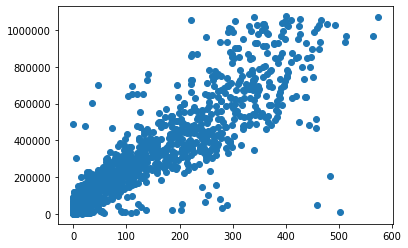

In [6]:
plt.scatter(breakopps, winnings)
plt.show()

After some exploration, it appears that there is a relatively strong relationship between the BreakPointsOpportunities feature and the Winnings outcome. This insinuates that players that have more opportunities for breaking points in a match, tend to rack up more wins.

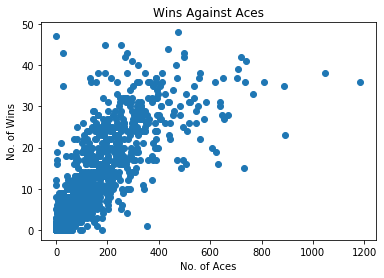

<Figure size 432x288 with 0 Axes>

In [48]:
rank = df[['Ranking']]
pointswon = df[['TotalPointsWon']]
wins = df[['Wins']]

aces = df[['Aces']]

plt.scatter(aces, wins)
plt.title('Wins Against Aces')
plt.xlabel('No. of Aces')
plt.ylabel('No. of Wins')
plt.show()
plt.clf()

# Linear Regression - Single Feature

Now, using the number of aces each player hits as a feature to predict number of wins, I've implemented a linear regression model. The steps towards implementing the model involve splitting the data into a training set, and a test set. The training set will be used to fit the data into the model, and the test set will be used to obtain a "score" to identify whether the model is accurate enough or not. Typically, a score of 0.7 or above means the model is reliable enough to use. 

In [8]:
aces_train, aces_test, wins_train, wins_test = train_test_split(aces, wins, train_size=0.8, test_size=0.2)

model = LinearRegression()

model.fit(aces_train, wins_train)

LinearRegression()

In [9]:
model.score(aces_test, wins_test)

0.7086934233606794

In [10]:
prediction = model.predict(aces_test)

Text(0, 0.5, 'Predicted Wins')

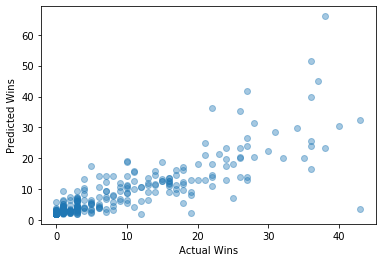

In [11]:
plt.scatter(wins_test, prediction, alpha=0.4)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')

In this graph, it can be seen that the predictions somewhat align with the actual results - indicating that the model is just about good enough with a score of 0.708.

Text(0, 0.5, 'Wins')

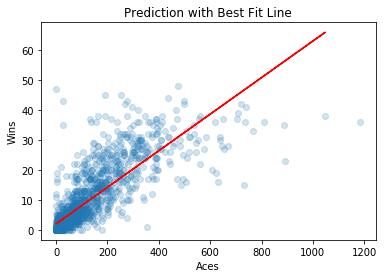

In [52]:
plt.scatter(aces, wins, alpha=0.2)
plt.plot(aces_test, prediction, color='r')

plt.title('Prediction with Best Fit Line')
plt.xlabel('Aces')
plt.ylabel('Wins')

In [13]:
len(aces_test.reset_index())

345

In [14]:
len(aces)

1721

In [15]:
len(prediction)

345

## Linear Regression with Multiple Features - 2 Features

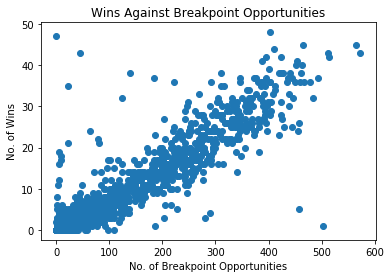

<Figure size 432x288 with 0 Axes>

In [49]:
plt.scatter(breakopps, wins)
plt.title('Wins Against Breakpoint Opportunities')
plt.xlabel('No. of Breakpoint Opportunities')
plt.ylabel('No. of Wins')
plt.show()
plt.clf()

In [41]:
features = df[['Aces', 'BreakPointsOpportunities']]

type(features)

pandas.core.frame.DataFrame

This time to improve the linear regression model, I will use breakpoint opportunities as an additional feature with which to predict number of wins of a tennis player.

In [42]:
features_train, features_test, wins_train, wins_test = train_test_split(features, wins, train_size=0.8, test_size=0.2)

model.fit(features_train, wins_train)

LinearRegression()

In [43]:
model.score(features_test, wins_test)

0.8269791426188126

In [44]:
prediction_with_features = model.predict(features_test)

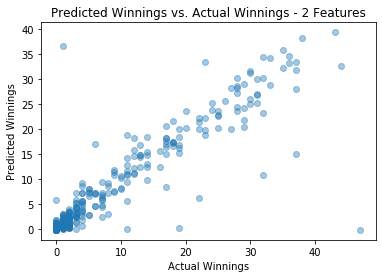

<Figure size 432x288 with 0 Axes>

In [50]:
plt.scatter(wins_test, prediction_with_features, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

As seen with the score and also with the visualization, predicted winnings and actual winnings show high alignment - indicating that this model is reliable.

# Linear Regression with Multiple Features - More than 2 Features

Predicting Winnings with Multiple Features Test Score: 0.8372497648557953


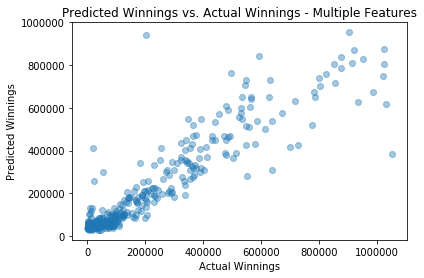

<Figure size 432x288 with 0 Axes>

In [35]:
## multiple features linear regression

# select features and value to predict
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

As we can see above, we can add as many features as possible. But one must be cautious about how well the features will contribute to the key insight - which in this case is the predicted winnings of a player.